In [5]:
#from ava_functions import *

In [6]:
## rigettando anche sulla base del ppp

In [7]:
#import os
#os.chdir('../../../Desktop/Criticality in barrel cortex')

In [8]:
#from power import *
##from powerlaw_fit import *
#from stats import *
import matplotlib.cm as cm
cmap = cm.tab10

In [9]:
from statsmodels.tsa.stattools import acf
def x_autocorr_sm(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y = acf(x_data,fft=True,nlags=N)
    
    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

    
    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)
    result = {}
    result['tau'] = x
    result['C'] = np.array([y_mu,y_1,y_2])
    return result

In [10]:
def plot_corr(x, y_mu, y_1,y_2, y_mu_rand, y_1_rand,y_2_rand, tau_star):
    plt.rcParams['font.size'] = 18
    fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)
    lw = 2
    alpha_val = .5
    ## Plot the empirical autocorrelation
    x_ = x
    y_ = y_mu
    z1_ = y_1
    z2_ = y_2
    c_ = cmap(0)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



    ## Plot the randomized autocorrelation
    x_ = x
    y_ = y_mu_rand
    z1_ = y_1_rand
    z2_ = y_2_rand
    c_ = cmap(1)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


    ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


    ## Layout stuff
    ax.legend(loc='upper right')

    ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.set_xlabel(r'Time Lag, $\tau$')#,labelpad=0)
    ax.set_ylabel(r'$C(\tau)$')
    ax.set_ylim(-0.1,0.3)


    x_annot_tau = 0.8
    y_annot_tau = 0.6
    ax.annotate(r'$\tau^*=%s$'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction')

In [11]:
def x_autocorr_sm_ext(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    y_random = np.zeros((nrep,N+1))
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

        ## randomize
        np.random.shuffle(x_data_i)
        y_random[i_nrep,:] =  acf(x_data_i,fft=True,nlags=N)#[1:]


    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)

    y_mu_rand = np.mean(y_random,axis=0)
    y_1_rand,y_2_rand = np.percentile(y_random,q=q,axis=0)

    result = {}
    result['tau'] = x
    result['C'] = [y_mu,y_1,y_2]
    result['C_rand'] = [y_mu_rand,y_1_rand,y_2_rand]
    result['tmp'] = [y_original,y_random]
    return result

In [12]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [13]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def autocorr_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T
    

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]

    #S_shape_ = np.zeros((N))
    #for ch in range(spikes.shape[1]):
    #    S_shape_ += spikes[:,ch]
    #where_spikes = np.where(S_shape_ != 0)
    #interspike_time = (where_spikes - np.roll(where_spikes,1))
    #interspike_time = np.delete(interspike_time,0) # remove the first element
    #mean_interspike_time = np.sum(interspike_time)/len(interspike_time)
    #mean_interspike_time = int(round(mean_interspike_time))
    #mean_interspike_time
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    
    
    v = x_autocorr_sm(new)  


    return v['C'], v['tau']

In [14]:
def calculate_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    return new

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [207]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [213]:
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


(0.0, 1000.0)

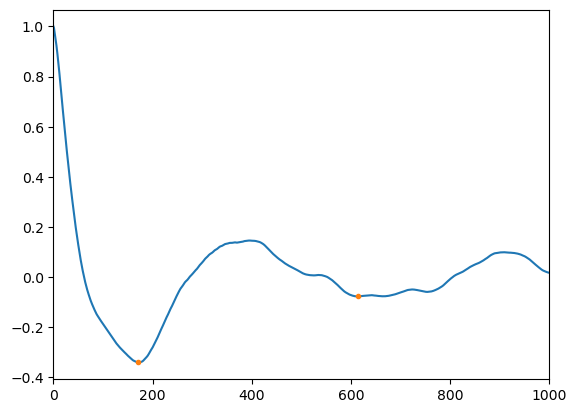

In [163]:
plt.plot(np.arange(0,len(cc),1),cc)
plt.plot(minima, cc[minima],'.')
plt.xlim(0,1000)

(0.0, 1000.0)

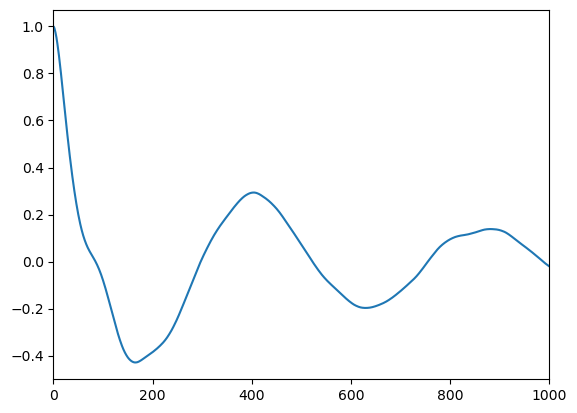

In [178]:
plt.plot(cc)
plt.xlim(0,1000)

In [176]:
cc = res['C'][0]
data = cc
maxima = argrelextrema(data, np.greater, order = 100)[0]
minima = argrelextrema(data, np.less, order = 100)[0]

x_to_fit = np.insert(maxima,0,0)
y_to_fit = np.insert(data[maxima],0,1)
params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
print(params_max)
x_to_fit = np.insert(minima,0,0)
y_to_fit = np.insert(data[minima],0,-1)

params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 5))

x_to_fit = np.concatenate([np.zeros(1), minima])
y_to_fit = np.concatenate([-np.ones(1), data[minima]])
print(y_to_fit)



params_min, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 5))
print(params_min)
y_to_fit = np.insert(data[minima],0,-1)

print(y_to_fit)
params_min, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 5))
print(params_min)
#tcorr[idx] = (params_max[0] + params_min[0])/2*0.002

[333.85361677   0.9658908 ]
[-1.         -0.42945643 -0.19746841 -0.1010792  -0.08038948 -0.05100221
 -0.00782236 -0.01236902 -0.05109545 -0.07152489 -0.03295396 -0.02945101
 -0.06215579 -0.06001659 -0.0418072  -0.0312779  -0.04050299 -0.03549726
 -0.02640451 -0.0505061  -0.04516716 -0.04682357 -0.03784401 -0.04793287
 -0.04023111 -0.02745668 -0.02552654 -0.02939213 -0.05927491 -0.02640892
 -0.02569779 -0.0324241  -0.05138949 -0.01678568 -0.01561535 -0.0264375
 -0.02310599 -0.03430515 -0.04162718 -0.03889502 -0.05242702 -0.02566836
 -0.03315296 -0.05337382 -0.04986427 -0.05427266 -0.02335703 -0.02131536
 -0.04593193 -0.04980407 -0.05374031 -0.02128396 -0.03458335 -0.02229293
 -0.07800058 -0.07899227 -0.06219551 -0.04993542 -0.03852891 -0.02989438
 -0.02415461 -0.06104998 -0.06059528 -0.01673713 -0.02691972 -0.04362137
 -0.03568233 -0.02093909 -0.02254351 -0.04313046 -0.08307359 -0.05542605
 -0.02698954 -0.03759572 -0.03454615 -0.02638146 -0.01819904 -0.00655575
 -0.0269944  -0.02164336

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\3560847169.py:24: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1


In [203]:
import scipy.io
import scipy.signal
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf, ccf
def monoExp(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return a*(np.exp(-t/tau) - 1) + 1


def monoExp2(t, tau, a):
    """
    Exponetial function, starting at 1 in t = 0.

    Parameters
    ----------
    t : numpy.ndarray
        Time.
    tau : float
        Autocorrelation time.
    a : float
        Scale factor.

    Returns
    -------
    numpy.ndarray
        Exponential function.
    """
    return -(a*(np.exp(-t/tau) - 1) +1)

def fit_envelope_autocorr(data, delta_t = 0.002):
    """
    Fit the exponential envelope of the autocorrelation function.

    Parameters
    ----------
    autocorr : numpy.ndarray
        Autocorrelation functions. Each row is the autocorrelation
        for a given channel.
    delta_t : float, optional
        Sampling time of the experimental signals.
        The default is 0.002s.

    Returns
    -------
    tcorr : numpy.ndarray
        Autocorrelation times for each channel.
    """

    maxima = argrelextrema(data, np.greater, order = 100)[0]
    minima = argrelextrema(data, np.less, order = 100)[0]

    x_to_fit = np.insert(maxima,0,0)
    g = data[maxima]
    y_to_fit = np.insert(g,0,1)
    params_max, _ = curve_fit(monoExp, x_to_fit, y_to_fit, (250, 1))
    #print(params_max)
    
    
    
    
    
    x_to_fit = np.insert(minima,0,0)
    g = data[minima]
    y_to_fit = np.insert(g,0,-1)
    
    params_min, _ = curve_fit(monoExp2, x_to_fit, y_to_fit, (250, 1))
    #print(params_min)
    
    tcorr = (params_max[0] + params_min[0])/2*delta_t
            
    return params_max[0]*delta_t


In [154]:
np.insert(np.array([1,2,3]),0,0)

array([0, 1, 2, 3])

## EEg autocorrelations

In [19]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
## you can discard subjec t 23 and 24

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up

In [11]:
##  diceva di controllare time scales david poeppel

'C:\\Users\\Benedetta\\Downloads\\NewbornEEGData-20220203T094950Z-001\\NewbornEEGData'

In [169]:

cc = []
cc2 = []
interv = 10
good_sub = []
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        good_sub.append(subj)
        #print('doing')
        c,tau = autocorr_events(data.T,2,interv)
        #print(len(c))
        cc.append(c)
        c,tau = autocorr_events(data2.T,2,interv)
        #print(len(c))
        cc2.append(c)
##        

5 176.234 173.36
6 180.236 188.316
9 180.27 189.194
11 180.272 189.74
12 161.202 189.458
16 180.32 189.32
17 156.904 177.246
18 180.274 187.092
19 180.278 189.276
23 180.266 189.13
30 180.288 189.442
33 180.246 194.122
35 180.354 188.032
37 158.758 188.344
40 180.33 188.484
45 160.454 189.766
47 180.262 175.118
49 180.32 201.342
52 180.286 204.674
56 180.258 189.098
58 180.25 189.528
62 180.288 156.796
66 153.938 192.518
67 180.278 191.454
68 151.68 181.138
71 180.294 142.926
14 180.222 187.464
22 180.306 187.944
27 180.268 187.53
41 180.234 190.122
46 156.062 210.666
64 180.27 181.934


In [206]:
good_sub

[5, 6, 9]

In [208]:
tau1s = [[] for i in range(len(good_sub))]
tau2s = [[] for i in range(len(good_sub))]
interv = 10
o = 0
#good_sub = []
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        #good_sub.append(subj)
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        
        for l in range(data.shape[0]):
            #print('doing')
            res = x_autocorr_sm(data[l])
            sig = res['C'][0]
            tau1 = fit_envelope_autocorr(sig)
            tau1s[o].append(tau1)
            
            #print(len(c))
            
        for l in range(data2.shape[0]):

            res = x_autocorr_sm(data2[l])
            sig = res['C'][0]
            tau2 = fit_envelope_autocorr(sig)
            tau2s[o].append(tau2)
        o+=1
    #break

5 176.234 173.36
[218.4595731    0.96766605]
[160.89971514   0.96650418]
[225.48879502   0.96928067]
[183.52811597   0.96762963]
[245.31565722   0.96682346]
[174.19834932   0.96702564]
[334.59593747   0.96611497]
[214.92999523   0.9643887 ]
[292.98785724   0.9634529 ]
[201.11014756   0.96261494]
[264.94896923   0.96685938]
[164.83211324   0.96627849]
[379.8757525   0.9658045]
[230.17141677   0.96400447]
[462.06308376   0.95944054]
[429.25502351   0.95729943]
[529.59621195   0.95284917]
[513.67008462   0.95126521]
[498.35428701   0.95190639]
[474.65018836   0.9506514 ]
[604.2518218    0.95243935]
[513.98800309   0.94970599]
[580.88424323   0.94170175]
[495.71556051   0.93999114]
[461.30062427   0.94782054]
[420.59256308   0.94586727]
[654.09878297   0.95091197]
[660.59128417   0.9523345 ]
[516.82010165   0.96282599]
[498.04024648   0.96206964]
[415.68801014   0.95682658]
[369.32426906   0.95576517]
[397.67726992   0.96274706]
[317.7229145    0.96138037]
6 180.236 188.316
[298.64497425  

[289.05876031   0.96318889]
[205.16948917   0.96199752]
[289.07559803   0.97152402]
[163.17849436   0.9708403 ]
[295.05673406   0.96614729]
[162.84444293   0.96557881]
[402.4163246    0.96863433]
[223.34896196   0.96733822]
[300.95796989   0.96202514]
[248.57765945   0.96138589]
19 180.278 189.276
[295.85610541   0.96734386]
[254.92729682   0.96622304]
[240.34283789   0.96247675]
[235.32514904   0.96424464]
[310.45993213   0.96653976]
[303.17222214   0.9668529 ]
[264.08242202   0.97052902]
[251.29200106   0.9704264 ]
[237.80172718   0.96795767]
[218.61295705   0.96792654]
[223.20526657   0.96656567]
[174.4907288    0.96648627]
[188.87912142   0.97193772]
[161.63312266   0.97148528]
[242.22711485   0.96859705]
[214.72691577   0.96922342]
[151.87430083   0.96995661]
[157.12054365   0.96830531]
[234.17003684   0.97143983]
[153.24929203   0.96951027]
[234.71218978   0.97087536]
[144.25952118   0.97005353]
[160.5268377    0.96907132]
[181.05150098   0.96899957]
[188.92219338   0.97069294]
[

[185.45974456   0.96974117]
[166.70742854   0.96871307]
[260.01791104   0.9684665 ]
[165.23322318   0.96853161]
[245.6114951    0.96162784]
[173.54180564   0.96109714]
47 180.262 175.118
[432.29240844   0.96904823]
[245.05173452   0.96755694]
[236.57144851   0.96756705]
[181.95818107   0.96787089]
[204.06424835   0.96735948]
[194.74234808   0.96866364]
[249.05540816   0.97140557]
[145.1442313    0.97011008]
[343.78442296   0.96443336]
[202.22071634   0.96271392]
[238.88197763   0.96976382]
[138.82232105   0.96913622]
[239.61096966   0.96929941]
[121.42046329   0.96833059]
[326.38263868   0.96670006]
[147.52306027   0.9642996 ]
[374.06141286   0.96184371]
[227.68939638   0.9615494 ]
[345.97225125   0.96485336]
[304.49552805   0.96476347]
[440.23188538   0.96107812]
[352.01572797   0.95857452]
[422.14159853   0.95918885]
[342.08778788   0.95707945]
[349.85037124   0.9667924 ]
[244.00833739   0.96690061]
[394.72299154   0.96893449]
[254.20100804   0.96628313]
[685.53333971   0.95365643]
[

[197.04181497   0.97077626]
[126.67197015   0.97184816]
[212.34736644   0.97189369]
[141.0695142    0.97060271]
[456.61945141   0.9636486 ]
[424.39804163   0.96255102]
[279.46777101   0.96912304]
[142.29697152   0.96911387]
[242.88464524   0.97243658]
[115.29890949   0.97092276]
[254.50611645   0.96802935]
[183.03413828   0.96675468]
68 151.68 181.138
[197.39273534   0.96890371]
[162.02415915   0.96999836]
[228.66736834   0.96612052]
[150.42147846   0.96672622]
[239.42845738   0.96445768]
[181.29200007   0.96248742]
[256.46841826   0.96009012]
[157.08171351   0.95893962]
[219.24702726   0.96336799]
[175.0407096    0.96132571]
[197.29314861   0.96931365]
[127.80872709   0.9669969 ]
[228.40396462   0.96712096]
[148.02800191   0.96759552]
[209.63772748   0.96004137]
[159.58147091   0.96023382]
[261.77093959   0.96851578]
[172.32017657   0.9676925 ]
[277.33801342   0.96519335]
[161.44565018   0.96697602]
[298.63547708   0.96591532]
[208.93245477   0.96523539]
[306.58447681   0.96576188]
[1

In [102]:
sig = res['C'][0]
a  = fit_envelope_autocorr(sig)
a

[195.00234304   0.97175094] [[1.97233575e+02 1.91552104e-03]
 [1.91552104e-03 2.43404271e-06]]


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\2824070719.py:24: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1


0.20094358117729505

In [216]:
good_sub = np.asarray(good_sub, dtype = int)
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [219]:
tau1s = np.asarray(tau1s)
tau2s = np.asarray(tau2s)

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\1929512027.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau1s = np.asarray(tau1s)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\1929512027.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tau2s = np.asarray(tau2s)


In [317]:
t1_frenc = funct2(sub_fren, tau1s)
t1_span = funct2(sub_span, tau1s)
t1_en= funct2(sub_en, tau1s)

t2_frenc = funct2(sub_fren, tau2s)
t2_span = funct2(sub_span, tau2s)
t2_en= funct2(sub_en, tau2s)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ##

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\277544956.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([t1_frenc, t1_span, t1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\277544956.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ##


[335.86268183   0.96592283]
[215.89171537   0.96473129]
0.5517543971968621


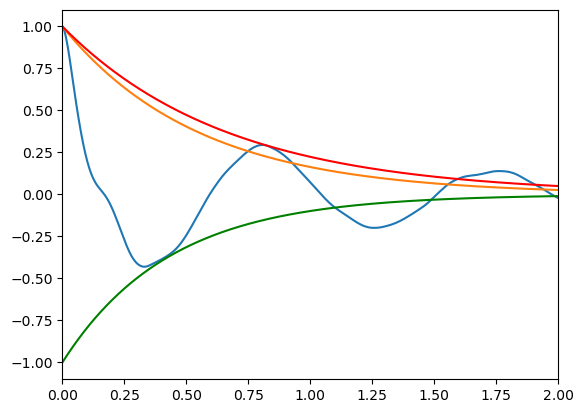

In [202]:
res = x_autocorr_sm(data[3])

sig = res['C'][0]
a  = fit_envelope_autocorr(sig)
print(a)

plt.plot(res['tau']/500,sig)
plt.xlim(0,2)
plt.plot(res['tau']/500,monoExp(res['tau']/500,a,1))
plt.plot(res['tau']/500,monoExp(res['tau']/500,334.08297222*0.002,1), color ='red')
plt.plot(res['tau']/500,monoExp2(res['tau']/500,215.52017319*0.002,1.), color ='green')

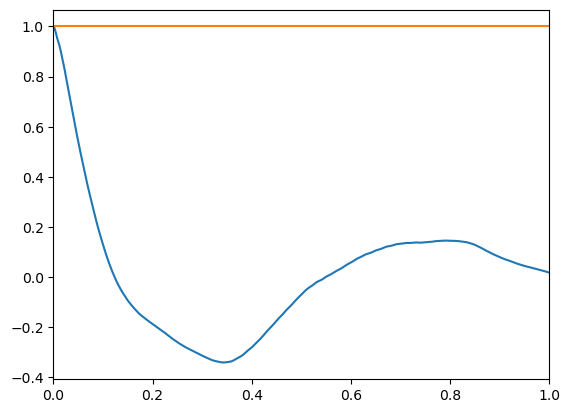

In [94]:
plt.plot(res['tau']/500,sig)
plt.xlim(0,1)
plt.plot(monoExp(res['tau']/500,tau2,0.00001))

In [318]:
a = 0
for i in t1_frenc:
    a+= len(i)
print(a)

#a = 0
for i in t2_frenc:
    a+= len(i)
a

113


221

In [319]:
o = 0
df_fren = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,221,1), dtype = 'float')
for j in range(len(t1_frenc)):
    
    ntrial = len(t1_frenc[j])
    
    for r in range(ntrial):
       
        df_fren.iloc[o]["tau_c"] = float(t1_frenc[j][r])

        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_frenc)):
    
    ntrial = len(t2_frenc[j])
    
    for r in range(ntrial):
       
        df_fren.iloc[o]["tau_c"] = float(t2_frenc[j][r])

        df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
        df_fren.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_fren["Silence"] = ["1" for r in range(113) ]+ ["2" for r in range(108)]


221


In [333]:
a = 0
for i in t1_span:
    a+= len(i)
print(a)
c = a
#a = 0
for i in t2_span:
    a+= len(i)
print(a, a-c)


76
164 88


In [334]:
o = 0
df_span = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,164,1), dtype = 'float')
for j in range(len(t1_span)):
    
    ntrial = len(t1_span[j])
    
    for r in range(ntrial):
       
        df_span.iloc[o]["tau_c"] = float(t1_span[j][r])

        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_span)):
    
    ntrial = len(t2_span[j])
    
    for r in range(ntrial):
       
        df_span.iloc[o]["tau_c"] = float(t2_span[j][r])

        df_span.iloc[o]["sub_id"]  = funct2(sub_span, good_sub)[j]
        df_span.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_span["Silence"] = ["1" for r in range(76) ]+ ["2" for r in range(88)]


164


In [336]:
df_fren.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_fren.csv", index = True)
df_span.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_span.csv", index = True)
df_en.to_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/tau_en.csv", index = True)

In [331]:
pd.read_csv("../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/fren.csv", index_col = 0)

Silence     tau_c  sub_id   ch
0          1  0.542652    66.0  0.0
1          1  0.518412    66.0  1.0
2          1  0.424604    66.0  2.0
3          1  0.371044    66.0  3.0
4          1  0.370191    66.0  4.0
..       ...       ...     ...  ...
216        2  0.487911    56.0  4.0
217        2  0.448473    56.0  5.0
218        2  0.477559    56.0  6.0
219        2  0.503569    56.0  7.0
220        2  0.534939    56.0  8.0

[221 rows x 4 columns]

In [266]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      221         Method:                 REML    
No. Groups:            12          Scale:                  0.0156  
Min. group size:       16          Log-Likelihood:         115.3659
Max. group size:       20          Converged:              Yes     
Mean group size:       18.4                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.515    0.033 15.597 0.000  0.451  0.580
Silence[T.2]              0.050    0.044  1.146 0.252 -0.036  0.136
Group Var                 0.011    0.046                           
Group x Silence[T.2] Cov -0.004    0.044                           
Silence[T.2] Var          0.020    0.082                       

In [261]:
a = 0
for i in t1_en:
    a+= len(i)
print(a)

#a = 0
for i in t2_en:
    a+= len(i)
a

89


189

In [260]:
t2_en

array([list([0.7363133585155948, 0.8592948579378674, 0.6938118812465229, 0.5842257538454678, 0.5928964025017948, 0.8523598473437626, 0.5153557436615919, 0.5881134909109074, 0.7017291694239536]),
       list([0.5235418791702242, 0.5546760268430453, 0.5972709541545643, 0.6131689536121694, 0.4955461324709076, 0.5051952494989397, 0.5574184175011068, 0.5790647753941097, 0.7952961791663307]),
       list([0.618969413746437, 0.4992729492016069, 0.5271787220652886, 0.5483700949197896, 0.5271529048613867, 0.5473258004994379, 0.4985770185968542, 0.47484630779503767, 0.5052810760378468, 0.5653522164637659]),
       list([1.1606476833874064, 1.0338559417121567, 0.6202727563093128, 0.6226446357933653, 0.6183102387605235, 0.7906323237904707, 0.757251751168687, 0.5997985057413574, 0.5890112970563515, 0.6497917257419661]),
       list([0.3105176880234816, 0.39786605504730965, 0.40224149265858117, 0.40772848179107285, 0.3655684494818396, 0.364867703503172, 0.43913660184616865, 0.3988039603635505]),
   

In [335]:
o = 0
df_en = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id', 'ch' ],  index = np.arange(0,189,1), dtype = 'float')
for j in range(len(t1_en)):
    
    ntrial = len(t1_en[j])
    
    for r in range(ntrial):
       
        df_en.iloc[o]["tau_c"] = float(t1_en[j][r])

        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
        
        
for j in range(len(t2_en)):
    
    ntrial = len(t2_en[j])
    
    for r in range(ntrial):
       
        df_en.iloc[o]["tau_c"] = float(t2_en[j][r])

        df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
        df_en.iloc[o]["ch"] = int(r)
        o+=1
print(o)
df_en["Silence"] = ["1" for r in range(89) ]+ ["2" for r in range(100)]


189


In [263]:
df_en

Silence     tau_c  sub_id   ch
0         1  0.709435    33.0  0.0
1         1  0.682107    33.0  1.0
2         1  0.710066    33.0  2.0
3         1  0.644199    33.0  3.0
4         1  0.824240    33.0  4.0
..      ...       ...     ...  ...
184       2  0.525882    30.0  3.0
185       2  0.485663    30.0  4.0
186       2  0.487494    30.0  5.0
187       2  0.411766    30.0  6.0
188       2  0.692988    30.0  7.0

[189 rows x 4 columns]

In [264]:
import statsmodels.api as sm

import statsmodels.formula.api as smf
md = smf.mixedlm("tau_c ~Silence", df_fren, groups=df_fren["sub_id"], re_formula="~Silence")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     tau_c   
No. Observations:      189         Method:                 REML    
No. Groups:            11          Scale:                  0.0093  
Min. group size:       14          Log-Likelihood:         144.7897
Max. group size:       20          Converged:              Yes     
Mean group size:       17.2                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.594    0.037 15.964 0.000  0.521  0.667
Silence[T.2]             -0.053    0.035 -1.496 0.135 -0.122  0.016
Group Var                 0.014    0.073                           
Group x Silence[T.2] Cov -0.008    0.057                           
Silence[T.2] Var          0.011    0.065                       

(44059,) (132,)


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\1400088892.py:24: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1


0.2239290244406904

In [267]:
##CALCULATE TAUS
nrep = 10**3
q1,q2 = 1,99
taustar1 = []
taustar2 = []
interv = 10
good_sub = []
o = 0
indice = 3
flagf, flage,flags = False,False,False
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan2 = data2.shape[0]
    #if o ==0: flagf, flage,flags = True, True, True
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        good_sub.append(subj)
        #print('doing')
        new1 = calculate_events(data.T,2,interv)
        new2 = calculate_events(data2.T,2,interv)

        result = x_autocorr_sm_ext(np.log(new1 + 0.0001),nrep=nrep,q=[q1,q2])
        x = result['tau']*1000*interv*1/500
        y_mu,y_1,y_2 = result['C']
        y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        tau_star = x[ind_t_star]
        taustar1.append(tau_star)

        if subj in sub_fren and flagf:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After French example silence 1')
            
            #flagf = False

        if subj in sub_en and flage:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After english example silence 1')
            
            #flage = False 
            
        if subj in sub_span and flags:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After spanish example silence 1')
            
            #flags = False

        result = x_autocorr_sm_ext(np.log(new2+ 0.0001),nrep=nrep,q=[q1,q2])
        x = result['tau']*1000*interv*1/500
        y_mu,y_1,y_2 = result['C']
        y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        tau_star = x[ind_t_star]
        taustar2.append(tau_star) ##one tau for each subjectn, number of events
        
        if subj in sub_fren and flagf:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After French example silence 2')
            #flagf = False
             
        if subj in sub_en and flage:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After english example silence 2')
            #flage = False
            
        if subj in sub_span and flags:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After spanish example silence 2')
            #flags = False
            
    #o+=1


5 142.926 142.926
6 142.926 142.926
9 142.926 142.926
11 142.926 142.926
12 142.926 142.926
16 142.926 142.926
17 142.926 142.926
18 142.926 142.926
19 142.926 142.926
23 142.926 142.926
30 142.926 142.926
33 142.926 142.926
35 142.926 142.926
37 142.926 142.926
40 142.926 142.926
45 142.926 142.926
47 142.926 142.926
49 142.926 142.926
52 142.926 142.926
56 142.926 142.926
58 142.926 142.926
62 142.926 142.926
66 142.926 142.926
67 142.926 142.926
68 142.926 142.926
71 142.926 142.926
14 142.926 142.926
22 142.926 142.926
27 142.926 142.926
41 142.926 142.926
46 142.926 142.926
64 142.926 142.926


In [61]:
minima = argrelextrema(sig, np.less, order = 100)[0]


x_to_fit = np.insert(sig[minima],0,1)

In [46]:
m = argrelextrema(res['C'][0], np.greater, order = 100)[0]

In [50]:
sig = res['C'][0]
#plt.xlim(0,1000
sig[m]

array([ 0.18612273,  0.09153136,  0.06894921,  0.05558954,  0.02517854,
        0.03784872,  0.05212026,  0.04859174,  0.01383251,  0.05855908,
        0.08086186,  0.04485057,  0.0042499 ,  0.03659524,  0.04928758,
        0.02644073,  0.0070287 ,  0.02896418,  0.01924021,  0.03426496,
        0.02128058,  0.03225031,  0.01130742,  0.06493577,  0.02875913,
        0.03289311,  0.05972289,  0.01636116,  0.03628975,  0.04629508,
        0.06053174,  0.03006871,  0.0420388 ,  0.03213619,  0.04785057,
        0.04198148,  0.07614391,  0.02954962,  0.02470646,  0.03892808,
        0.02253149,  0.04041841,  0.04558454,  0.03879969,  0.01327226,
        0.02220109,  0.00845787,  0.01566844,  0.01623309,  0.0458052 ,
        0.03017572,  0.01937095,  0.02851668,  0.01049597,  0.0338389 ,
        0.05204744,  0.05107736,  0.06613094,  0.0201783 ,  0.0635555 ,
        0.03693949,  0.07416776,  0.03171421,  0.02432777,  0.02233589,
        0.02305275,  0.0580099 ,  0.02645445,  0.01453065,  0.04

In [269]:
taustar1= np.asarray(taustar1)
taustar2= np.asarray(taustar2)

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [270]:
t1_frenc = funct2(sub_fren, taustar1)
t1_span = funct2(sub_span, taustar1)
t1_en= funct2(sub_en, taustar1)

t2_frenc = funct2(sub_fren, taustar2)
t2_span = funct2(sub_span, taustar2)
t2_en= funct2(sub_en, taustar2)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\4287316683.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([t1_frenc, t1_span, t1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16276\4287316683.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english


In [275]:
good_sub = np.asarray(good_sub)

In [297]:

t2_en

o = 0
df_en = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id' ],  index = np.arange(0,22,1), dtype = 'float')
for j in range(len(t1_en)):
    
    #ntrial = len(t1_en[j])
    
    #for r in range(ntrial):
       
    df_en.iloc[o]["tau_c"] = float(t1_en[j])

    df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
        
        
for j in range(len(t2_en)):
    
    #ntrial = len(t2_en[j])
    
    #for r in range(ntrial):
       
    df_en.iloc[o]["tau_c"] = float(t2_en[j])

    df_en.iloc[o]["sub_id"]  = funct2(sub_en, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
print(o)
df_en["Silence"] = ["1" for r in range(11) ]+ ["2" for r in range(11)]


22


In [294]:
df_fren = pd.DataFrame(columns = ['Silence', 'tau_c', 'sub_id' ],  index = np.arange(0,24,1), dtype = 'float')

In [296]:

t2_en

o = 0
for j in range(len(t1_frenc)):
    
    #ntrial = len(t1_en[j])
    
    #for r in range(ntrial):
       
    df_fren.iloc[o]["tau_c"] = float(t1_frenc[j])

    df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
        
        
for j in range(len(t2_frenc)):
    
    #ntrial = len(t2_en[j])
    
    #for r in range(ntrial):
       
    df_fren.iloc[o]["tau_c"] = float(t2_frenc[j])

    df_fren.iloc[o]["sub_id"]  = funct2(sub_fren, good_sub)[j]
    #df_en.iloc[o]["ch"] = int(r)
    o+=1
print(o)
df_fren["Silence"] = ["1" for r in range(12) ]+ ["2" for r in range(12)]


24


In [314]:
stats.ttest_rel(df_fren["tau_c"][df_fren["Silence"]=="1"],df_fren["tau_c"][df_fren["Silence"]=="2"], alternative ='less')

TtestResult(statistic=-0.5622793723175931, pvalue=0.2926007615074494, df=11)

In [315]:
stats.ttest_rel(df_en["tau_c"][df_en["Silence"]=="1"],df_en["tau_c"][df_en["Silence"]=="2"], alternative ='greater')

TtestResult(statistic=1.2080650160523068, pvalue=0.12740772526048091, df=10)

In [301]:
import scipy.stats as stats 
import statsmodels.api as sm
md = smf.ols("tau_c ~Silence", data = df_fren ,)
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tau_c   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2621
Date:                Wed, 15 May 2024   Prob (F-statistic):              0.614
Time:                        23:50:29   Log-Likelihood:                -243.80
No. Observations:                  24   AIC:                             491.6
Df Residuals:                      22   BIC:                             494.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5296.6667   1882.847      2.813      0.010    1391.882    9201.452
Silence[T.2]  1363.3333   2662.747      0.512      0.614   -4158.867    6885.533
==============================================================================
Omnibus:                       16.493   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.745
Skew:                           1.767   Prob(JB):                     0.000231
Kurtosis:                       5.065   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
import scipy.stats as stats 

stats.ttest_ind(t2_en[:], t2_frenc[:11],alternative = 'less')
### comunque la statitìstica è poca

Ttest_indResult(statistic=-1.8266209110339209, pvalue=0.04136086126942943)

In [313]:
import scipy.stats as stats 

stats.ttest_rel(t1_frenc, t2_frenc,alternative = 'less')

TtestResult(statistic=-0.5622793723175931, pvalue=0.2926007615074494, df=11)

In [251]:
import scipy.stats as stats 

stats.ttest_rel(t1_span, t2_span,alternative = 'less')

TtestResult(statistic=0.7846233564994731, pvalue=0.7723608236816174, df=8)

In [282]:
import scipy.stats as stats 

stats.ttest_rel(t1_en, t2_en, alternative = 'greater')

TtestResult(statistic=1.2080650160523068, pvalue=0.12740772526048091, df=10)

In [283]:
len(t1_en)

11